In [11]:
# %%capture
# !pip install -U pandasql
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
# from pandasql import sqldf

# Open the dataset 

In [12]:
table = pd.read_csv('/Users/marcovinciguerra/Github/GitTesi/Python/NNdata.csv')
table.head()

Date  IDStation                   NameStation  Ammonia  \
0  2018-01-01T00:00:00Z        677  Cremona Via Fatebenefratelli      6.2   
1  2018-01-01T00:00:00Z        681                        Moggio      1.4   
2  2018-01-01T00:00:00Z        703                  Schivenoglia      NaN   
3  2018-01-02T00:00:00Z        677  Cremona Via Fatebenefratelli      1.8   
4  2018-01-02T00:00:00Z        681                        Moggio      1.0   

   Arsenic  Benzene  Benzo_a_pyrene  Cadmium        CO  Lead  ...  \
0      NaN      NaN             NaN      NaN  0.508333   NaN  ...   
1      NaN      NaN             NaN      NaN       NaN   NaN  ...   
2      NaN      1.0             NaN      NaN  1.159091   NaN  ...   
3      NaN      NaN             NaN      NaN  0.375000   NaN  ...   
4      NaN      NaN             NaN      NaN       NaN   NaN  ...   

   IDStation.2                 NameStation.1  Wind_speed  Wind_direction  \
0          677  Cremona Via Fatebenefratelli    0.483454           314.0   
1          111     Cassina Valsassina Moggio    0.300970            65.0   
2          671             Mantova Tridolino    1.540787           288.0   
3          677  Cremona Via Fatebenefratelli    1.788399           284.0   
4          111     Cassina Valsassina Moggio    0.613183             9.0   

   Temperature  Relative_humidity  Global_radiation  Wind_speed_max  \
0     2.615278          93.738194         21.268056        2.133333   
1     2.095833          74.055556         60.152778        1.939583   
2     2.761806          99.475694         14.163194        3.524306   
3     5.974306          70.609722         72.734028        4.377083   
4     1.670139          39.194444         68.250000        3.075000   

   Wind_direction_max  Rainfall  
0                 NaN       7.2  
1               144.0       2.4  
2                 NaN       5.8  
3                 NaN       0.0  
4               213.0       0.0  

[5 rows x 31 columns]

# Plot di Cremona via Fatebenfratelli

# Plot of the time series


<AxesSubplot:xlabel='Date', ylabel='Ammonia'>

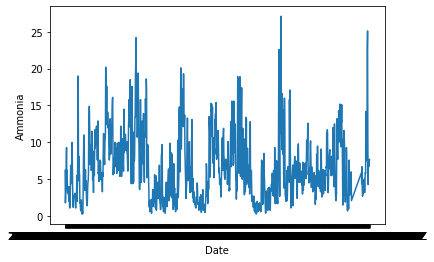

In [18]:
tableGraph = table.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]
sns.lineplot(x="Date", y="Ammonia", data=tableGraph)


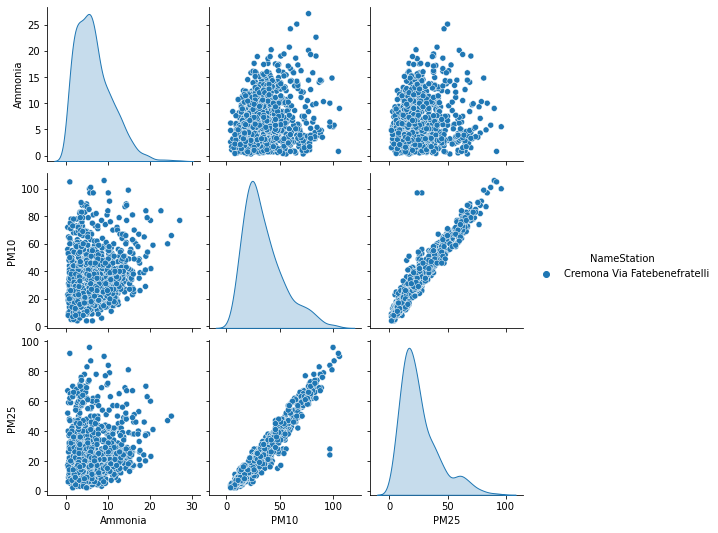

In [16]:
sns.pairplot(table.loc[table.NameStation == "Cremona Via Fatebenefratelli", ["NameStation", "Ammonia",
             "PM10", "PM25"]], hue="NameStation", kind="reg")


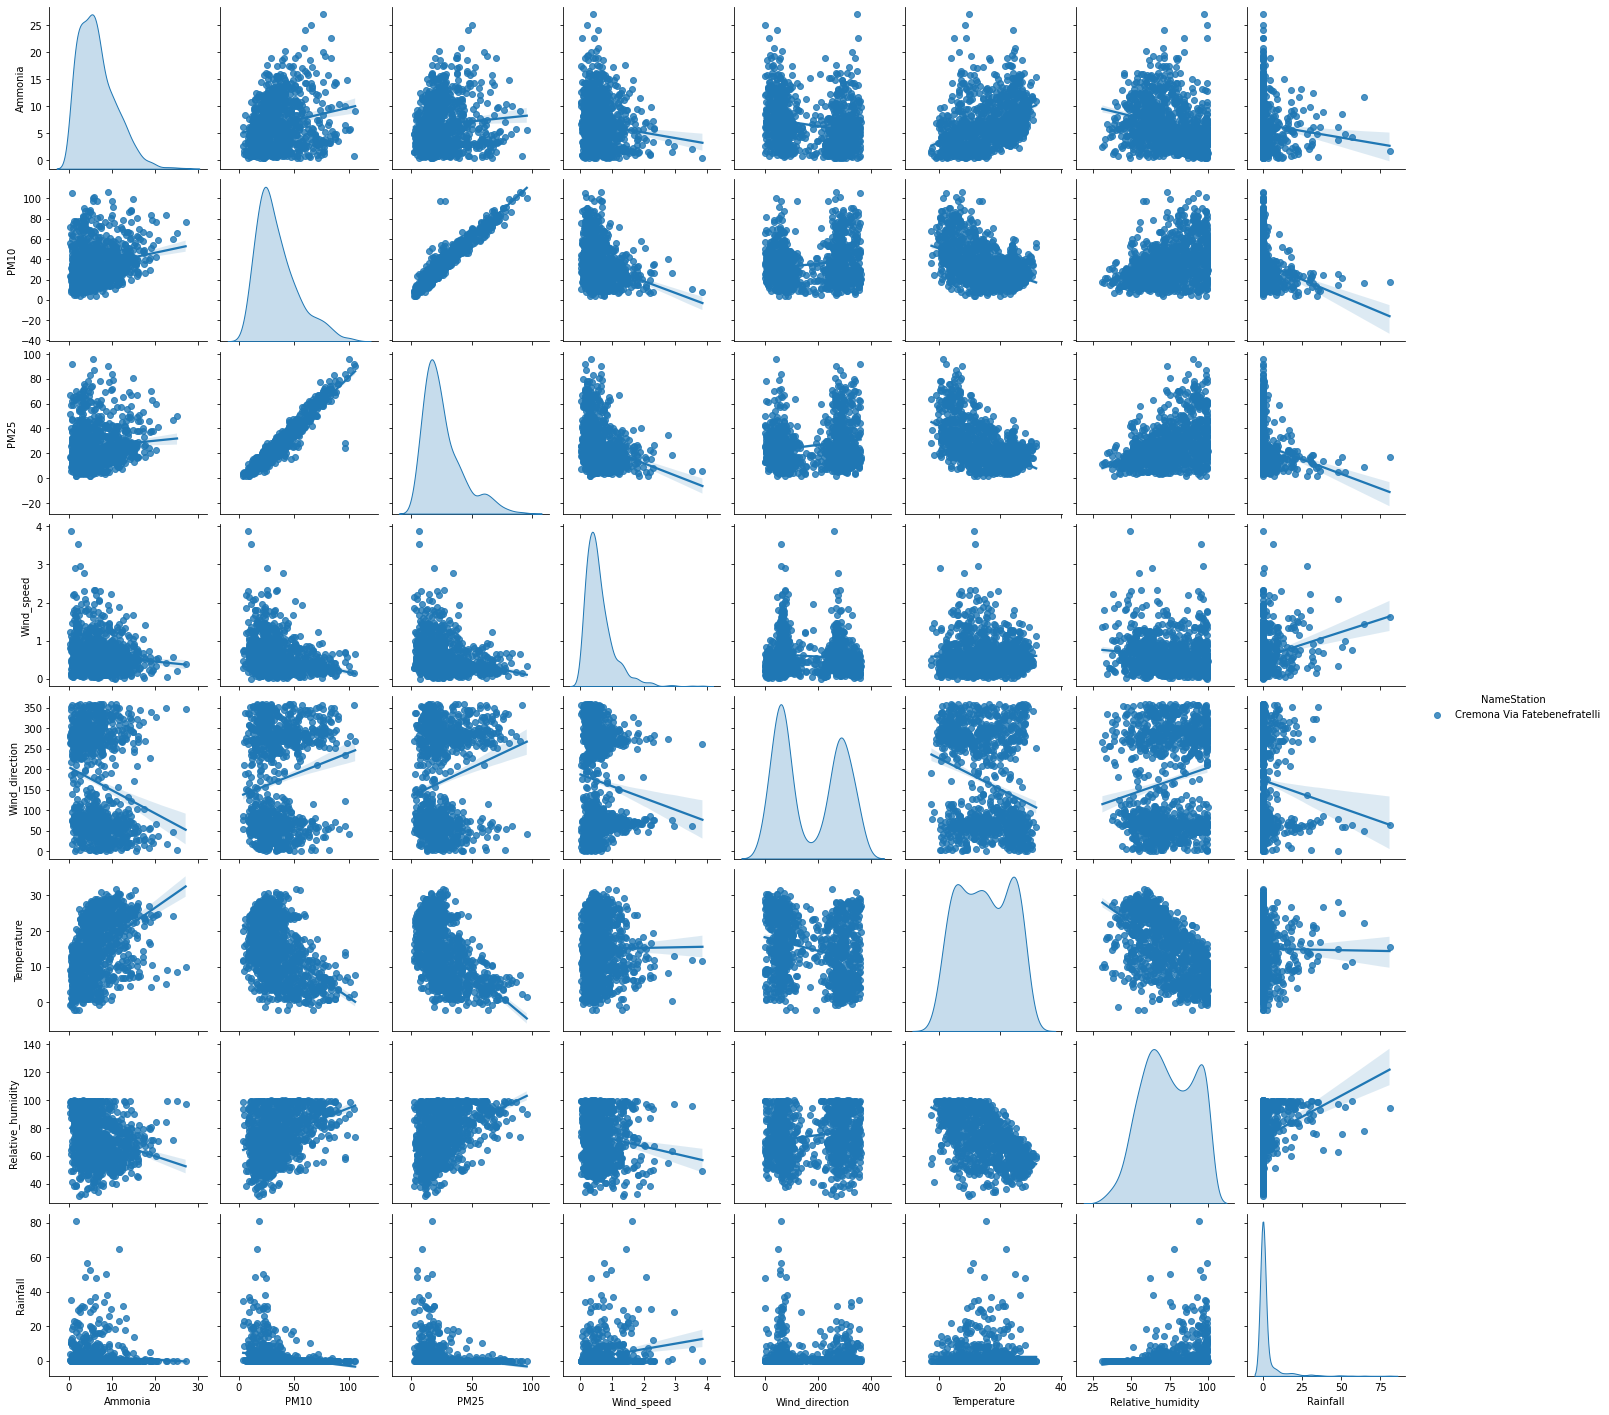

In [24]:
sns.pairplot(table.loc[table.NameStation == "Cremona Via Fatebenefratelli", ['NameStation', 'Ammonia', 'PM10',
             'PM25', 'Wind_speed', 'Wind_direction', 'Temperature', 'Relative_humidity', 'Rainfall']], hue="NameStation", kind="reg")


In [14]:
# now with rainfall zero values set to NaN
table1r = table.copy()
table1r.loc[table.loc[:,'Rainfall']==0,'Rainfall'] = np.nan
sns.pairplot(table1r.loc[:,['NameStation','Ammonia','PM10','PM2.5','Temperature','Relative_humidity','Global_radiation','Rainfall']],hue="NameStation")

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['PM2.5'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:

table2 = table.iloc[500:np.shape(table)[0],:] #altair can only use up to 5000 rows

table2 = table2.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
  x='PM10',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)

In [15]:
table1r.head()

Date  IDStation                   NameStation  Ammonia  \
0  2018-01-01T00:00:00Z        677  Cremona Via Fatebenefratelli      6.2   
1  2018-01-01T00:00:00Z        681                        Moggio      1.4   
2  2018-01-01T00:00:00Z        703                  Schivenoglia      NaN   
3  2018-01-02T00:00:00Z        677  Cremona Via Fatebenefratelli      1.8   
4  2018-01-02T00:00:00Z        681                        Moggio      1.0   

   Arsenic  Benzene  Benzo_a_pyrene  Cadmium        CO  Lead  ...  \
0      NaN      NaN             NaN      NaN  0.508333   NaN  ...   
1      NaN      NaN             NaN      NaN       NaN   NaN  ...   
2      NaN      1.0             NaN      NaN  1.159091   NaN  ...   
3      NaN      NaN             NaN      NaN  0.375000   NaN  ...   
4      NaN      NaN             NaN      NaN       NaN   NaN  ...   

   IDStation.2                 NameStation.1  Wind_speed  Wind_direction  \
0          677  Cremona Via Fatebenefratelli    0.483454           314.0   
1          111     Cassina Valsassina Moggio    0.300970            65.0   
2          671             Mantova Tridolino    1.540787           288.0   
3          677  Cremona Via Fatebenefratelli    1.788399           284.0   
4          111     Cassina Valsassina Moggio    0.613183             9.0   

   Temperature  Relative_humidity  Global_radiation  Wind_speed_max  \
0     2.615278          93.738194         21.268056        2.133333   
1     2.095833          74.055556         60.152778        1.939583   
2     2.761806          99.475694         14.163194        3.524306   
3     5.974306          70.609722         72.734028        4.377083   
4     1.670139          39.194444         68.250000        3.075000   

   Wind_direction_max  Rainfall  
0                 NaN       7.2  
1               144.0       2.4  
2                 NaN       5.8  
3                 NaN       NaN  
4               213.0       NaN  

[5 rows x 31 columns]

In [10]:
table2 = table2.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]
table3 = table2.copy()
# remove outliers
table3.loc[table2.loc[:,'Ammonia']>150,'Ammonia'] = np.nan
table3.loc[table2.loc[:,'PM10']>140,'PM10'] = np.nan


In [13]:

# create plot again
interval = alt.selection_interval()

table4 = table.iloc[2000:np.shape(table)[0],:]
table4 = table4.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]


points = alt.Chart(table4).mark_point().encode(
  x='Temperature',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table3).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)

# Moggio

# Plot of the time series


<AxesSubplot:xlabel='Date', ylabel='Ammonia'>

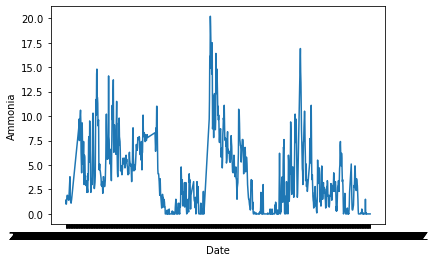

In [30]:
tableGraph = table.loc[table.NameStation == "Moggio", :]
sns.lineplot(x="Date", y="Ammonia", data=tableGraph)


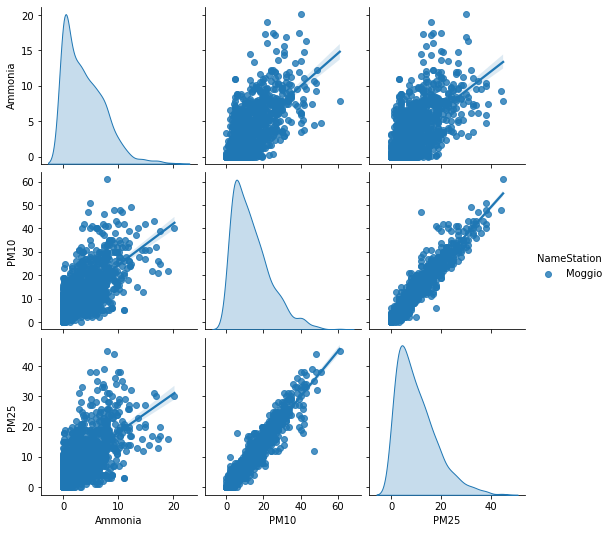

In [26]:
sns.pairplot(table.loc[table.NameStation == "Moggio", ["NameStation", "Ammonia",
             "PM10", "PM25"]], hue="NameStation", kind="reg")


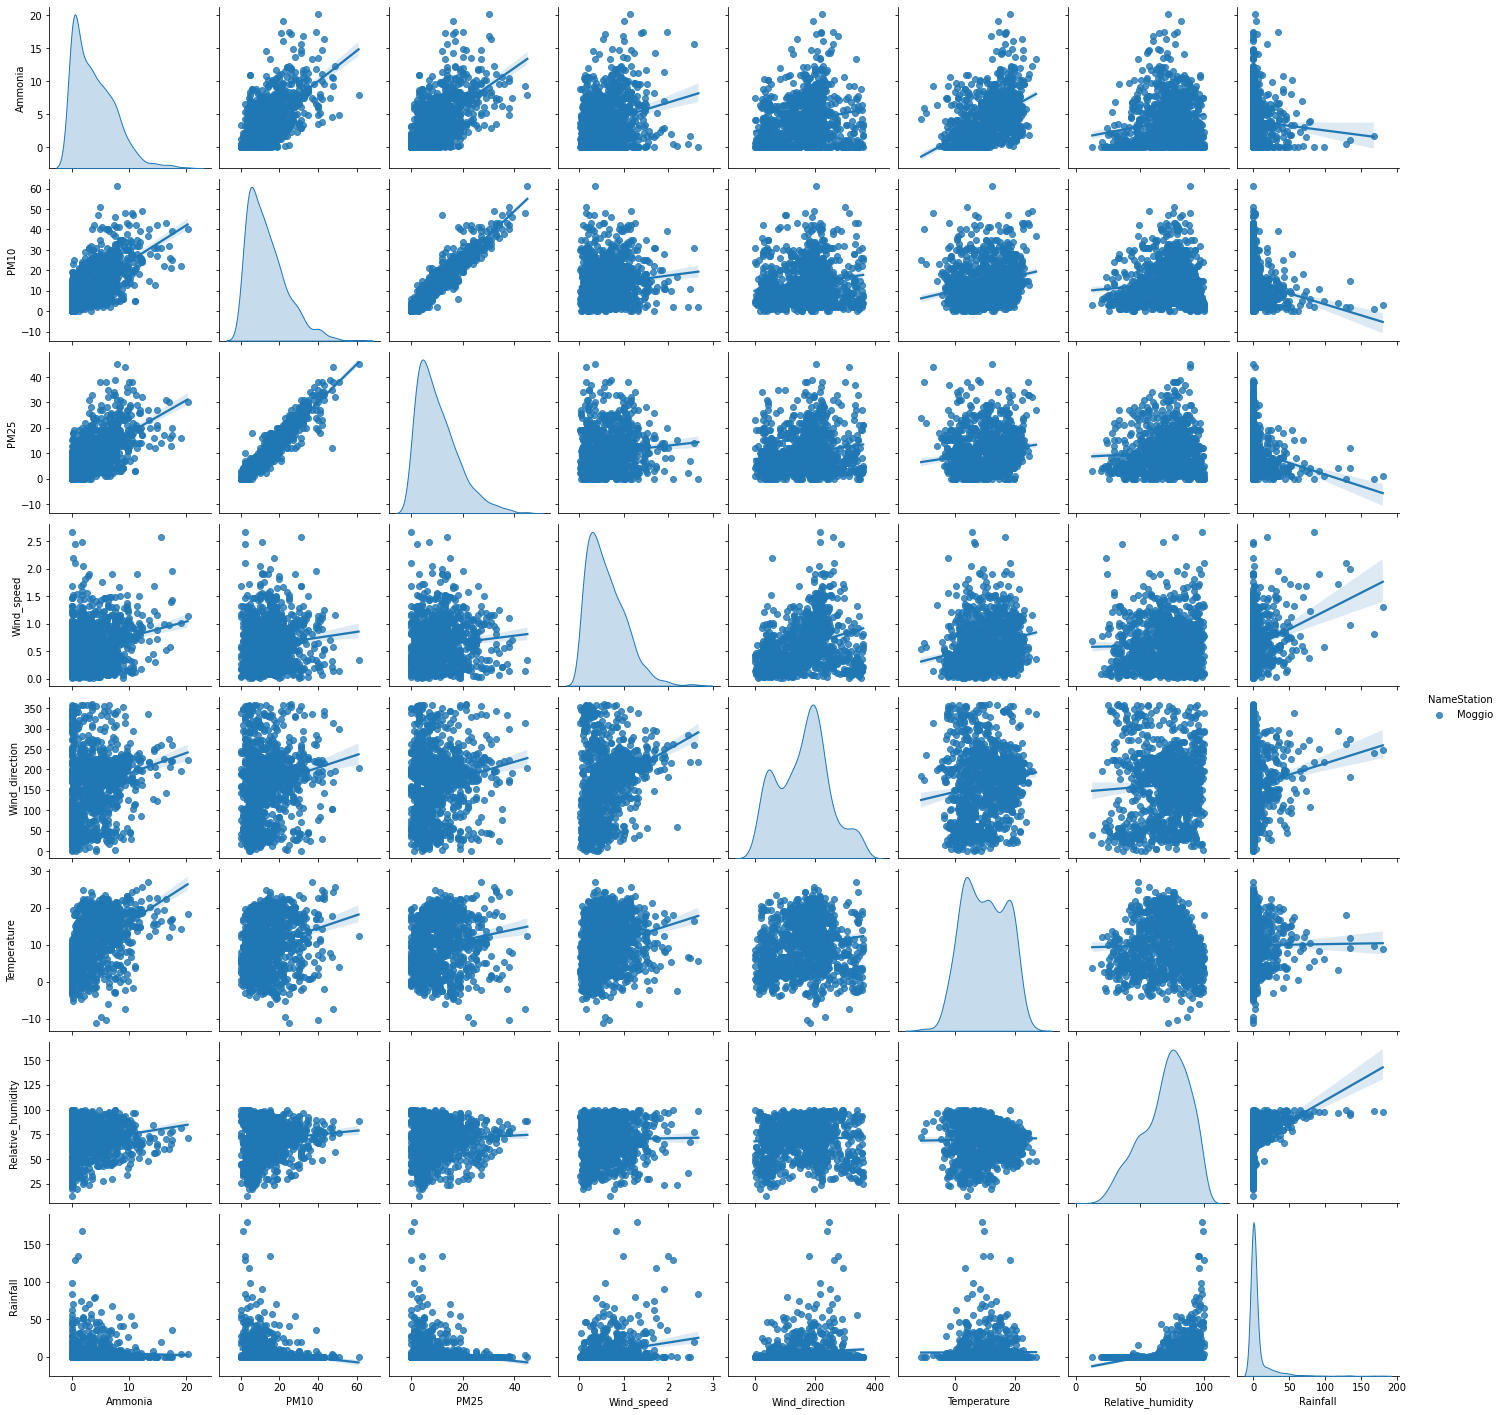

In [25]:
sns.pairplot(table.loc[table.NameStation == "Moggio", ['NameStation', 'Ammonia', 'PM10',
             'PM25', 'Wind_speed', 'Wind_direction', 'Temperature', 'Relative_humidity', 'Rainfall']], hue="NameStation", kind="reg")


In [5]:

# altair can only use up to 5000 rows
table2 = table.iloc[500:np.shape(table)[0], :]

table2 = table2.loc[table.NameStation == "Moggio", :]

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
    x='PM10',
    y='Ammonia',
    color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
    selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
    x='count()',
    y='NameStation',
    color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)

# Schivenoglia

# Plot of the time series


<AxesSubplot:xlabel='Date', ylabel='Ammonia'>

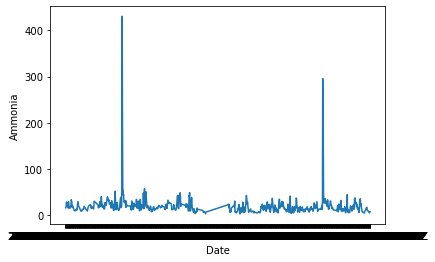

In [29]:
tableGraph = table.loc[table.NameStation == "Schivenoglia", :]
sns.lineplot(x="Date", y="Ammonia", data=tableGraph)


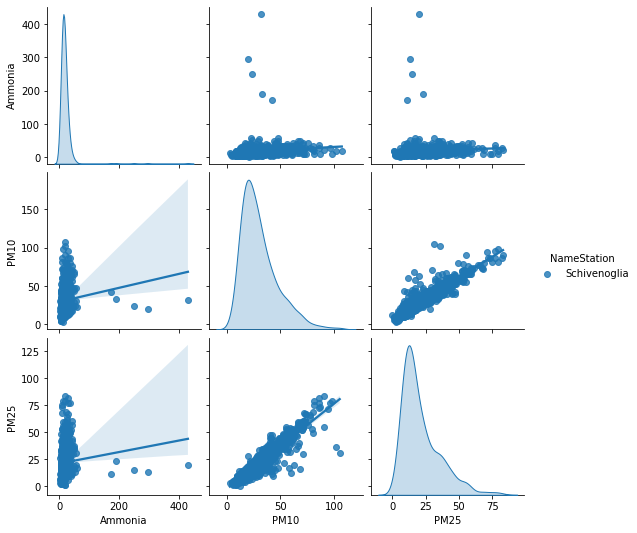

In [27]:
sns.pairplot(table.loc[table.NameStation == "Schivenoglia", ["NameStation", "Ammonia",
             "PM10", "PM25"]], hue="NameStation", kind="reg")


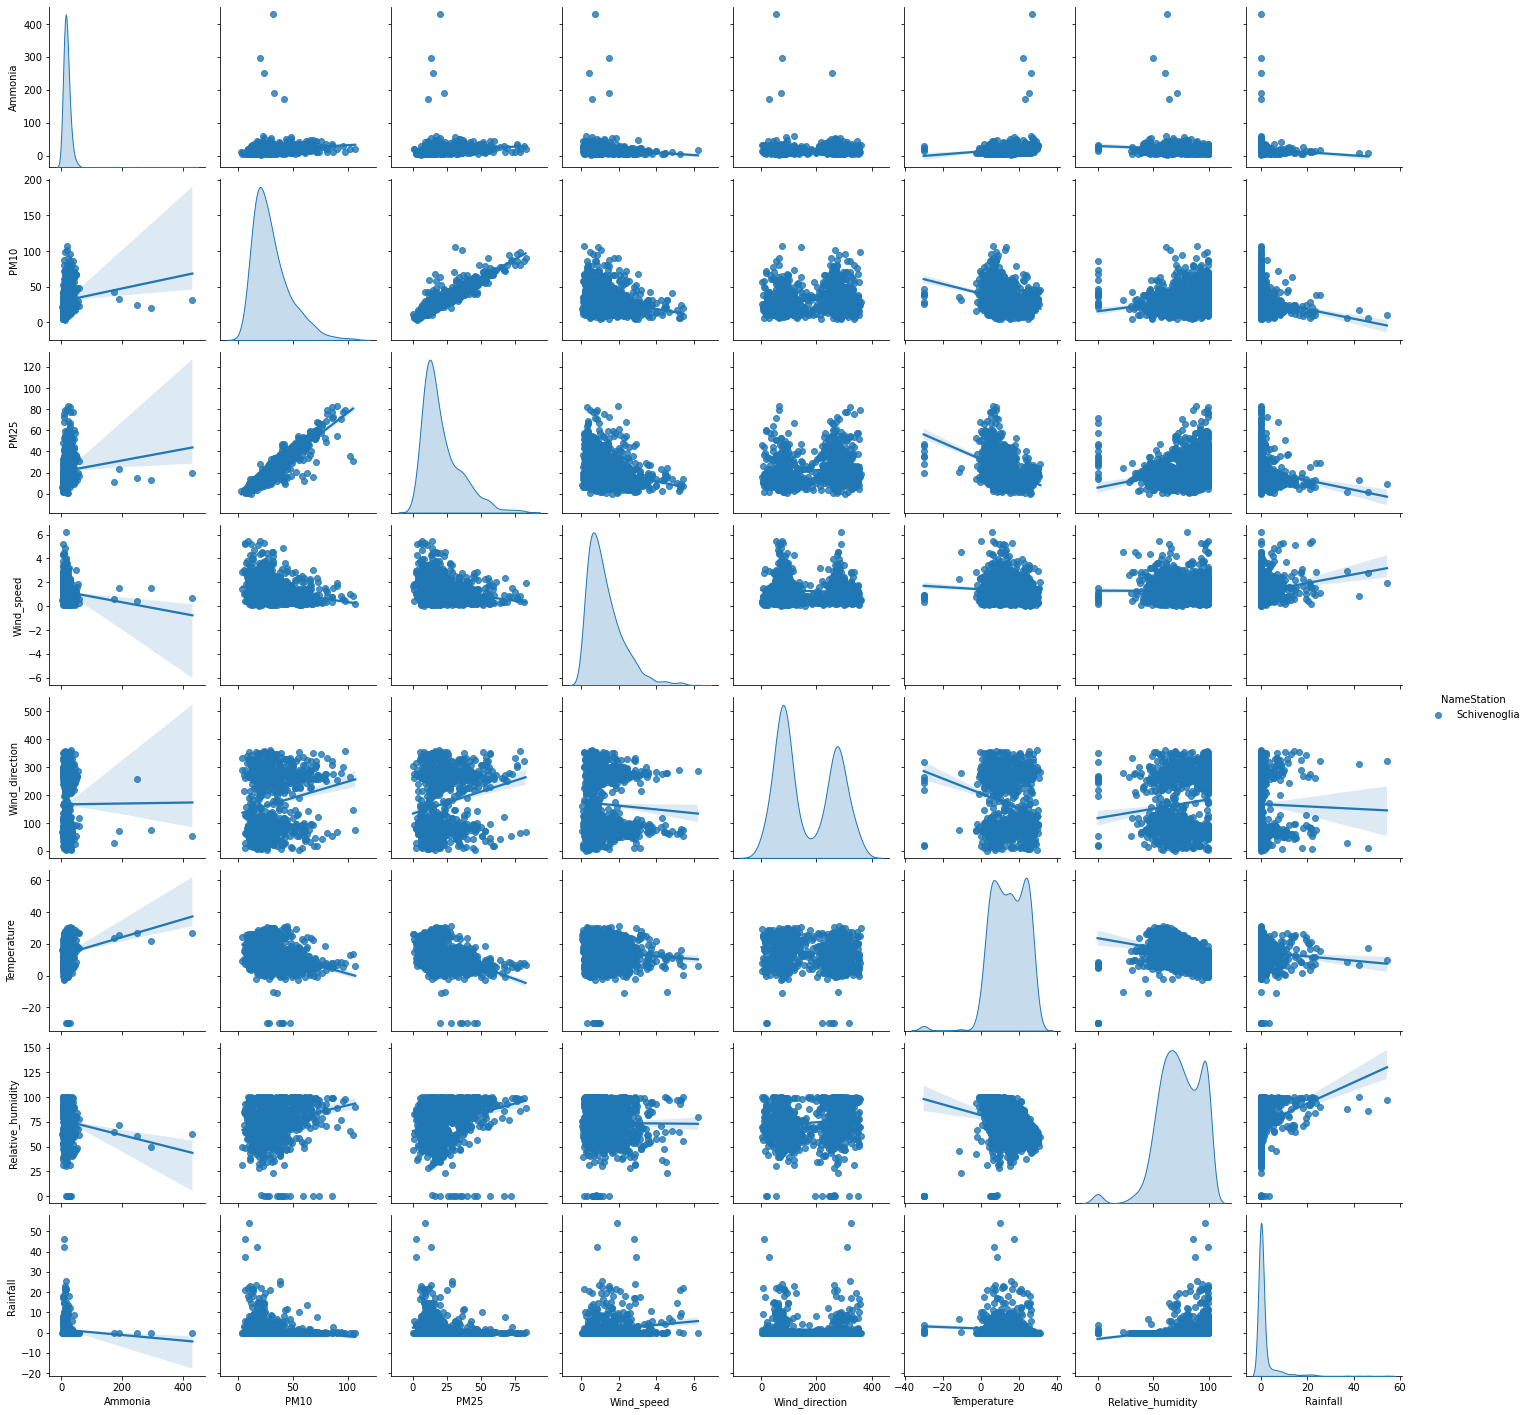

In [28]:
sns.pairplot(table.loc[table.NameStation == "Schivenoglia", ['NameStation', 'Ammonia', 'PM10',
             'PM25', 'Wind_speed', 'Wind_direction', 'Temperature', 'Relative_humidity', 'Rainfall']], hue="NameStation", kind="reg")


In [4]:

# altair can only use up to 5000 rows
table2 = table.iloc[500:np.shape(table)[0], :]

table2 = table2.loc[table.NameStation == "Schivenoglia", :]

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
    x='PM10',
    y='Ammonia',
    color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
    selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
    x='count()',
    y='NameStation',
    color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)